<a href="https://colab.research.google.com/github/SubhrajeetGhose/DeepLearning-CampusX/blob/main/CNN_Transfer_Learning_Feature_Extraction(Data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 82.9MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 274ms/step - accuracy: 0.8359 - loss: 0.3812 - val_accuracy: 0.9098 - val_loss: 0.2186
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 260ms/step - accuracy: 0.8951 - loss: 0.2419 - val_accuracy: 0.9144 - val_loss: 0.2018
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 271ms/step - accuracy: 0.9050 - loss: 0.2199 - val_accuracy: 0.9176 - val_loss: 0.1960
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 269ms/step - accuracy: 0.9137 - loss: 0.2045 - val_accuracy: 0.9158 - val_loss: 0.1962
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 257ms/step - accuracy: 0.9148 - loss: 0.2006 - val_accuracy: 0.9184 - val_loss: 0.1902
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 258ms/step - accuracy: 0.9234 - loss: 0.1851 - val_accuracy: 0.8864 - val_loss: 0.2718
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 254ms/step - accuracy: 0.9246 - loss: 0.1818 - val_accuracy: 0.9164 - val_loss: 0.2108
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 268ms/step - accuracy: 0.9241 - loss: 0.17

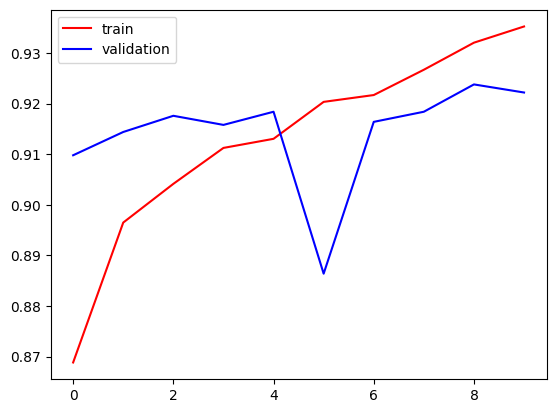

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

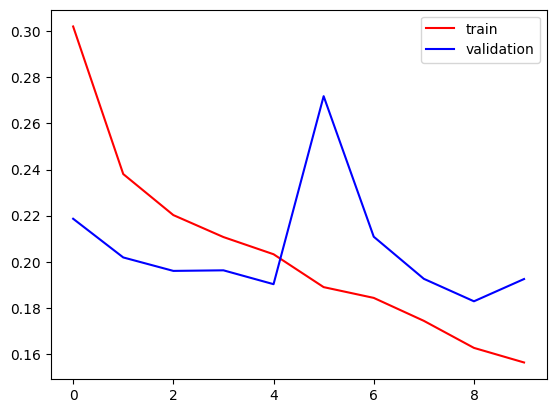

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()